【データ】
test_dataframe_FFo8JQ.pkl
- pickleモジュールによりシリアル化したDataFrame
- ‘FFo8JQ’列: 目的物性
- その他の列：特徴量

【課題】
- 提供するDataFrameについて、自由に処理を行い、分析する。
各行が物質に対応し、各列が物質の特徴および物性を表すDataFrameがある。
1. このデータを分析し、結果をまとめよ。
2. このデータを用いて機械学習する際、どのような前処理が適切か考えよ。

# 1. Load Dataset & Library

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

import math
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
with open('test_dataframe_FFo8JQ.pkl', 'rb') as f:
    data_raw = pickle.load(f)

In [3]:
data_raw

,e32i9Q,kIkJAQ,6Q4jYw,MiQmDg,9m8_8Q,qFRvOw,U5fZLA,xI_nhw,7BU-5Q,VoHXbQ,...,dd2iCg,a6PkFQ,WZrslA,1kzZYQ,qyqHqA,2Yoofg,uEe4TA,c6NeNw,hqQjMg,FFo8JQ
0,2.449490,2.449490,0,0,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,0,0,0,0,0,19.778861,8.690414,0.378951,1.284347,1.58
1,1.414214,1.414214,0,0,2.828427,1.414214,2.828427,2.828427,0.942809,1.849457,...,0,0,0,0,0,13.519806,3.744814,0.767772,0.903944,1.34
2,2.449490,2.449490,1,0,3.464102,1.732051,3.464102,3.464102,0.866025,2.178059,...,0,0,0,0,0,18.598866,3.541000,0.420112,0.759982,1.22
3,3.535534,3.535534,0,1,6.472136,2.000000,3.618034,6.472136,1.294427,2.525424,...,0,0,0,0,0,13.229494,8.766240,0.064239,0.683891,1.15
4,3.047207,3.305183,0,0,5.226252,1.847759,3.695518,5.226252,1.045250,2.408576,...,0,0,0,0,1,0.166593,5.714126,0.763690,0.659947,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,14.695181,12.678640,0,0,23.128032,2.424173,4.848346,23.128032,1.217265,3.862863,...,0,0,0,0,0,4.620617,9.409200,0.081146,32.655163,-8.08
1685,14.617702,14.142939,0,0,22.142232,2.804686,5.236665,22.142232,1.230124,3.889520,...,0,0,0,0,0,8.977439,7.890460,0.542856,23.548557,-6.86
1686,10.602371,10.260879,0,0,15.524322,2.402488,4.628161,15.524322,1.108880,3.542261,...,0,0,0,0,0,8.579006,2.165888,0.064865,1.686234,-1.83
1687,13.084601,11.840974,0,0,20.946550,2.341573,4.481647,20.946550,1.232150,3.755768,...,0,0,0,0,1,16.415053,6.748624,0.226144,5.749964,-3.38


### ※データからの考察
- 目的物性が連続的な数値データ　→　回帰問題
- サンプル（物質）数は1689個　→　深層学習を適用するにはデータが少ない　→　機械学習を用いる
- 約2000の特徴量　→　視覚化は難しい
- 物質数より特徴量数が多いため、線形手法には向いてない可能性

# 2. 前処理
## 2.1. 欠損データの確認

In [4]:
row_size = data_raw.shape[0]
col_size = data_raw.shape[1]

print(row_size)
print(col_size)

1689
2031


In [5]:
def NullCounter(df):
    row_size = df.shape[0]
    col_size = df.shape[1]
    
    null_num = 0
    for j in range(col_size):
        for i in range(row_size):
            if pd.isna(df.iloc[i, j]) == True:
                null_num += 1

    print(null_num)

'欠損値を列ごとにカウントしたい'

'欠損値を列ごとにカウントしたい'

In [6]:
NullCounter(data_raw)

696497


### 欠損値について
欠損値は696,497個

1689 rows × 2031 columns = 3,430,359

のうち20.30%が欠損値

## 2.1.1. 欠損値を含む特徴量（列）を除く

In [7]:
data = copy.deepcopy(data_raw)
data = data.dropna(1)
data

,e32i9Q,kIkJAQ,6Q4jYw,MiQmDg,XeAKcA,ngNDFg,Nw9Duw,3IDWOQ,XOjtmw,B6oImA,...,dd2iCg,a6PkFQ,WZrslA,1kzZYQ,qyqHqA,2Yoofg,uEe4TA,c6NeNw,hqQjMg,FFo8JQ
0,2.449490,2.449490,0,0,0,0,9,4,0,0,...,0,0,0,0,0,19.778861,8.690414,0.378951,1.284347,1.58
1,1.414214,1.414214,0,0,0,0,9,3,0,0,...,0,0,0,0,0,13.519806,3.744814,0.767772,0.903944,1.34
2,2.449490,2.449490,1,0,0,0,8,4,0,0,...,0,0,0,0,0,18.598866,3.541000,0.420112,0.759982,1.22
3,3.535534,3.535534,0,1,0,0,14,5,0,0,...,0,0,0,0,0,13.229494,8.766240,0.064239,0.683891,1.15
4,3.047207,3.305183,0,0,0,0,9,5,0,0,...,0,0,0,0,1,0.166593,5.714126,0.763690,0.659947,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,14.695181,12.678640,0,0,12,12,28,19,0,0,...,0,0,0,0,0,4.620617,9.409200,0.081146,32.655163,-8.08
1685,14.617702,14.142939,0,0,0,0,24,18,0,2,...,0,0,0,0,0,8.977439,7.890460,0.542856,23.548557,-6.86
1686,10.602371,10.260879,0,0,5,5,22,14,0,0,...,0,0,0,0,0,8.579006,2.165888,0.064865,1.686234,-1.83
1687,13.084601,11.840974,0,0,5,5,23,17,0,0,...,0,0,0,0,1,16.415053,6.748624,0.226144,5.749964,-3.38


## 2.1.2. 無限値（+-inf）を含む特徴量も除く

In [8]:
def InfCounter(df):
    row_size = df.shape[0]
    col_size = df.shape[1]
    
    null_num = 0
    for j in range(col_size):
        for i in range(row_size):
            if df.iloc[i, j] == np.inf or df.iloc[i, j] == -np.inf:
                null_num += 1

    print(null_num)

In [9]:
InfCounter(data)

129


In [10]:
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna(1)
data

,e32i9Q,kIkJAQ,6Q4jYw,MiQmDg,XeAKcA,ngNDFg,Nw9Duw,3IDWOQ,XOjtmw,B6oImA,...,dd2iCg,a6PkFQ,WZrslA,1kzZYQ,qyqHqA,2Yoofg,uEe4TA,c6NeNw,hqQjMg,FFo8JQ
0,2.449490,2.449490,0,0,0,0,9,4,0,0,...,0,0,0,0,0,19.778861,8.690414,0.378951,1.284347,1.58
1,1.414214,1.414214,0,0,0,0,9,3,0,0,...,0,0,0,0,0,13.519806,3.744814,0.767772,0.903944,1.34
2,2.449490,2.449490,1,0,0,0,8,4,0,0,...,0,0,0,0,0,18.598866,3.541000,0.420112,0.759982,1.22
3,3.535534,3.535534,0,1,0,0,14,5,0,0,...,0,0,0,0,0,13.229494,8.766240,0.064239,0.683891,1.15
4,3.047207,3.305183,0,0,0,0,9,5,0,0,...,0,0,0,0,1,0.166593,5.714126,0.763690,0.659947,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1684,14.695181,12.678640,0,0,12,12,28,19,0,0,...,0,0,0,0,0,4.620617,9.409200,0.081146,32.655163,-8.08
1685,14.617702,14.142939,0,0,0,0,24,18,0,2,...,0,0,0,0,0,8.977439,7.890460,0.542856,23.548557,-6.86
1686,10.602371,10.260879,0,0,5,5,22,14,0,0,...,0,0,0,0,0,8.579006,2.165888,0.064865,1.686234,-1.83
1687,13.084601,11.840974,0,0,5,5,23,17,0,0,...,0,0,0,0,1,16.415053,6.748624,0.226144,5.749964,-3.38


## 2.2. Train, Testデータ分け
- Train: 1000 / Test: 689

In [11]:
train_index = data.index[:1000]
test_index = data.index[1000:]

train_X = data.iloc[train_index, 0:-1]
train_y = data.iloc[train_index, -1]

test_X = data.iloc[test_index, 0:-1]
test_y = data.iloc[test_index, -1]

## 2.3. Scaling
- 特徴量ごとの平均を０、標準偏差を１と調整

In [12]:
X_scaler = StandardScaler()
X_scaler.fit(train_X)

y_scaler = StandardScaler()
y_scaler.fit(pd.DataFrame(train_y))

StandardScaler()

In [13]:
train_X_scaled = X_scaler.transform(train_X)
test_X_scaled = X_scaler.transform(test_X)

train_y_scaled = y_scaler.transform(pd.DataFrame(train_y))
test_y_scaled = y_scaler.transform(pd.DataFrame(test_y))

# 3. 回帰モデル
## 3.1. PLSRegression

In [14]:
regressor = PLSRegression()
regressor.fit(train_X_scaled, train_y_scaled)

pred_y_scaled = regressor.predict(test_X_scaled)
pred_y = y_scaler.inverse_transform(pred_y_scaled)

print("R2   : ", r2_score(test_y, pred_y))
print("RMSE : ", math.sqrt(mean_squared_error(test_y, pred_y)))

R2   :  -2.8848959654553084
RMSE :  3.5407179426129747


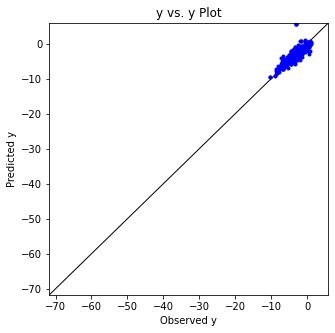

In [15]:
from YYPlot import YYPlot
yy_plot = YYPlot(test_y, pred_y)
yy_plot.draw_yyplot()

'YYPlotは、別途用意したものを読み込んだ'

## 3.2. SVR

In [16]:
regressor = svm.SVR()
regressor.fit(train_X_scaled, train_y_scaled)

pred_y_scaled = regressor.predict(test_X_scaled)
pred_y = y_scaler.inverse_transform(pred_y_scaled)

print("R2   : ", r2_score(test_y, pred_y))
print("RMSE : ", math.sqrt(mean_squared_error(test_y, pred_y)))

C:\Python\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


R2   :  0.8690687264883541
RMSE :  0.6500149289080184


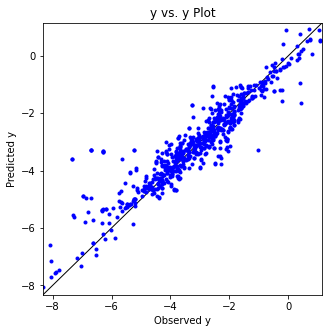

In [17]:
from YYPlot import YYPlot
yy_plot = YYPlot(test_y, pred_y)
yy_plot.draw_yyplot()

## 3.3. RamdomForest

In [18]:
regressor = RandomForestRegressor()
regressor.fit(train_X_scaled, train_y_scaled)

pred_y_scaled = regressor.predict(test_X_scaled)
pred_y = y_scaler.inverse_transform(pred_y_scaled)

print("R2   : ", r2_score(test_y, pred_y))
print("RMSE : ", math.sqrt(mean_squared_error(test_y, pred_y)))

<ipython-input-18-4bdc602d12d1>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(train_X_scaled, train_y_scaled)


R2   :  0.9952548821603272
RMSE :  0.12374428089290036


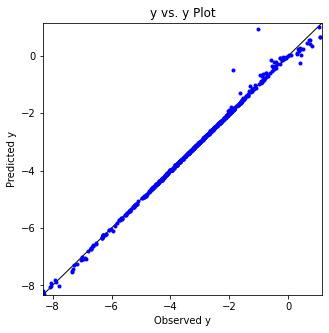

In [19]:
from YYPlot import YYPlot
yy_plot = YYPlot(test_y, pred_y)
yy_plot.draw_yyplot()

# 4. 結果・考察
4.1. 前処理
- 前処理の際には、モデル構築に使用できない値（欠損値・無限値）をどのように処理するかの問題。
- 欠損値を含む特徴量を除く方が、欠損値を含む物質を除く方より、削られる情報が少ないと判断した。

4.2. 回帰モデル
- PLSもよる線形モデルの構築は上手くできなかった。
- SVRの場合、GridSearchによるパラメータ調整を行うことで予測精度の向上が考えられる。
- RamdomForestの場合、高い予測精度のモデルが構築できた。